### Model Training

In [3]:
!python model_main_tf2.py \
    --pipeline_config_path=./models/CenterNetHourGlass104/v1/pipeline.config \
    --model_dir=./models/CenterNetHourGlass104/v1/ \
    #--checkpoint_dir=./models/CenterNetHourGlass104/v1/ \
    --checkpoint_every_n=100 \
    --alsologtostderr

2024-09-08 07:03:37.513623: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-08 07:03:37.535603: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-08 07:03:37.535628: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-08 07:03:37.535644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-08 07:03:37.540057: I tensorflow/core/platform/cpu_feature_g

In [2]:
import tensorflow as tf
print(tf.__version__)


2024-09-03 12:33:09.740533: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-03 12:33:09.763475: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 12:33:09.763505: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 12:33:09.763522: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-03 12:33:09.768034: I tensorflow/core/platform/cpu_feature_g

2.14.0


In [3]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"{len(gpus)} GPU device(s) available:")
    for gpu in gpus:
        print(f"- {gpu}")
else:
    print("No GPU devices found.")

1 GPU device(s) available:
- PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2024-09-03 12:33:10.812722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-03 12:33:10.836547: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-03 12:33:10.836646: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### Model Evaluation

In [3]:
%reload_ext tensorboard

%tensorboard --logdir 'models/CenterNetHourGlass104/v1/train' --port=6011

Reusing TensorBoard on port 6011 (pid 6900), started 8:14:04 ago. (Use '!kill 6900' to kill it.)

### Export Models

In [4]:
import re
import numpy as np

pipeline_file = "models/CenterNetHourGlass104/v1/pipeline.config"
last_model_path = "models/CenterNetHourGlass104/v1/"
output_directory = "exported_models/CenterNetHourGlass104/v1/"

!python exporter_main_v2.py \
    --pipeline_config_path {pipeline_file} \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --input_type=image_tensor

2024-09-07 19:20:21.870997: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-07 19:20:21.891934: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-07 19:20:21.891959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-07 19:20:21.891976: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-07 19:20:21.896126: I tensorflow/core/platform/cpu_feature_g

In [5]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print("GPU found")
else:
    print("No GPU found")

2024-09-07 19:21:11.752385: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-07 19:21:11.775320: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-07 19:21:11.775344: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-07 19:21:11.775358: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-07 19:21:11.779341: I tensorflow/core/platform/cpu_feature_g

GPU found


2024-09-07 19:21:12.756454: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-07 19:21:12.778822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-07 19:21:12.778918: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### Model Evaluation On Images

In [7]:
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [8]:
import sys

path2scripts = 'models/research/'
sys.path.insert(0, path2scripts)

In [9]:
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [10]:
path2config = "exported_models/CenterNetHourGlass104/v1/pipeline.config"
path2model = "exported_models/CenterNetHourGlass104/v1/checkpoint"

In [11]:
configs = config_util.get_configs_from_pipeline_file(path2config)
model_config = configs["model"]
detection_model = model_builder.build(model_config=model_config, is_training=False)

2024-09-07 19:21:13.357294: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-07 19:21:13.357415: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-07 19:21:13.357464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [12]:
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(path2model, 'ckpt-0')).expect_partial()

In [13]:
path2label_map = 'data/train/Letters_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(path2label_map,use_display_name=True)

In [14]:
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

In [15]:
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

In [16]:
def inference_with_plot(path2images, box_th=0.7):
    for image_path in path2images:
        print('Running inference for {}... '.format(image_path), end='')

        image_np = load_image_into_numpy_array(image_path)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        
        detections["num_detections"] = num_detections

        detections["detection_classes"] = detections["detection_classes"].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=box_th,
            agnostic_mode=False,
            line_thickness=5
        )

        plt.figure(figsize=[15,10])
        plt.imshow(image_np_with_detections)
        print('Done')
        plt.show()

In [17]:
def nms(rects, thd=0.5):
    out = []

    remove = [False] * len(rects)

    for i in range(0, len(rects) - 1):
        if remove[i]:
            continue
        inter = [0.0] * len(rects)
        for j in range(i, len(rects)):
            if remove[j]:
                continue
            inter[j] = intersection(rects[i][0], rects[j][0]) / min(square(rects[i][0]), square(rects[j][0]))

        max_prob = 0.0
        max_idx = 0
        for k in range(i, len(rects)):
            if inter[k] >= thd:
                if rects[k][1] > max_prob:
                    max_prob = rects[k][1]
                    max_idx = k

        for k in range(i, len(rects)):
            if (inter[k] >= thd) & (k != max_idx):
                remove[k] = True

    for k in range(0, len(rects)):
        if not remove[k]:
            out.append(rects[k])

    boxes = [box[0] for box in out]
    scores = [score[1] for score in out]
    classes = [cls[2] for cls in out]
    return boxes, scores, classes

def intersection(rect1, rect2):
    x_overlap = max(0, min(rect1[2], rect2[2]) - max(rect1[0], rect2[0]));
    y_overlap = max(0, min(rect1[3], rect2[3]) - max(rect1[1], rect2[1]));
    overlapArea = x_overlap * y_overlap;
    return overlapArea

def square(rect):
    return abs(rect[2] - rect[0]) * abs(rect[3] - rect[1])

In [18]:
def inference_as_raw_output(path2images,
                            box_th=0.25,
                            nms_th=0.5,
                            to_file=False,
                            data=None,
                            path2dir=False):
    
    print(f'Current data set is {data}')
    print(f'Ready to start inference on {len(path2images)} images!')

    for image_path in tqdm(path2images):

        if path2dir:
            image_path = os.path.join(path2dir, image_path.strip())

        image_np = load_image_into_numpy_array(image_path)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop("num_detections"))

        detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}

        detections["detection_classes"] = detections["detection_classes"].astype(np.int64)

        key_of_interest = ["detection_classes", "detection_boxes", "detection_scores"]
        detections = {key: value for key, value in detections.items() if key in key_of_interest}

        if box_th:
            for key in key_of_interest:
                scores = detections["detection_scores"]
                current_array = detections[key]
                filtered_current_array = current_array[scores > box_th]
                detections[key] = filtered_current_array

        if nms_th:
            output_info = list(zip(detections["detection_boxes"],
                                   detections["detection_scores"],
                                   detections["detection_classes"]))
            
        boxes, scores, classes = nms(output_info)

        detections["detection_boxes"] = boxes
        detections["detection_scores"] = scores
        detections["detection_classes"] = classes

        if to_file and data:
            image_h, image_w, _ = image_np.shape
            file_name = f'pred_result_{data}.txt'

            line2write = list()
            line2write.append(os.path.basename(image_path))

            with open(file_name, 'a+') as text_file:

                for b, s, c in zip(boxes, scores, classes):

                    y1abs, x1abs = b[0] * image_h, b[1] * image_w
                    y2abs, x2abs = b[2] * image_h, b[3] * image_w

                    list2append = [x1abs, y1abs, x2abs, y2abs, s, c]
                    line2append = ','.join([str(item) for item in list2append])

                    line2write.append(line2append)

                line2write = ' '.join(line2write)
                text_file.write(line2write + os.linesep)

        return detections

In [19]:
%matplotlib inline

Running inference for data/test/test/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg... 

2024-09-07 19:21:13.984829: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-09-07 19:21:14.220022: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2024-09-07 19:21:14.259084: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Done


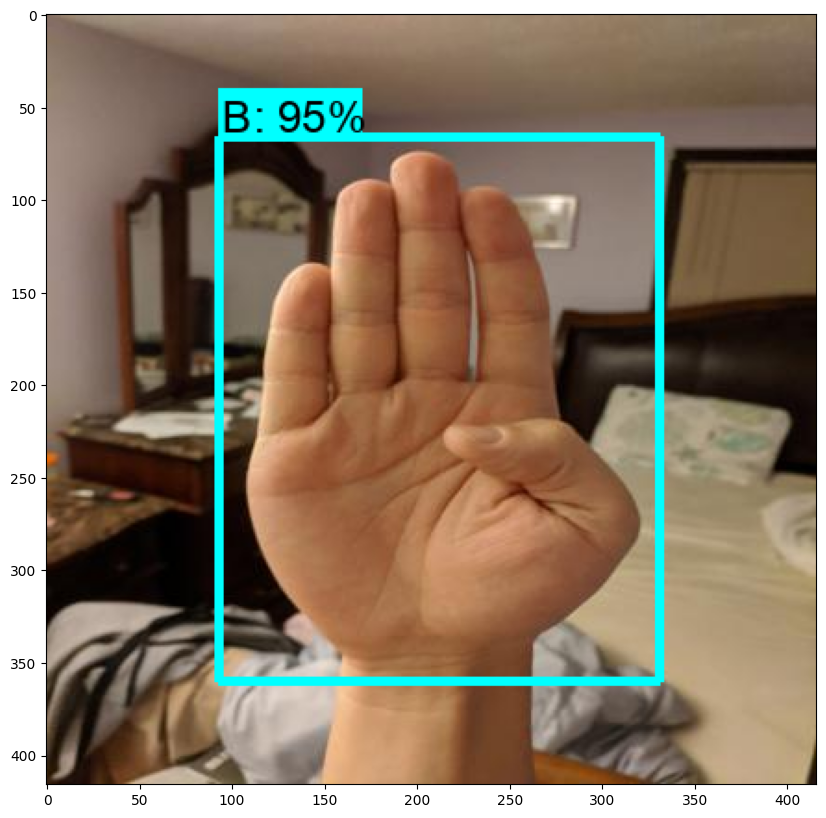

Running inference for data/test/test/O12_jpg.rf.9103647cd190af96ac2a83f7bd1d0ae2.jpg... Done


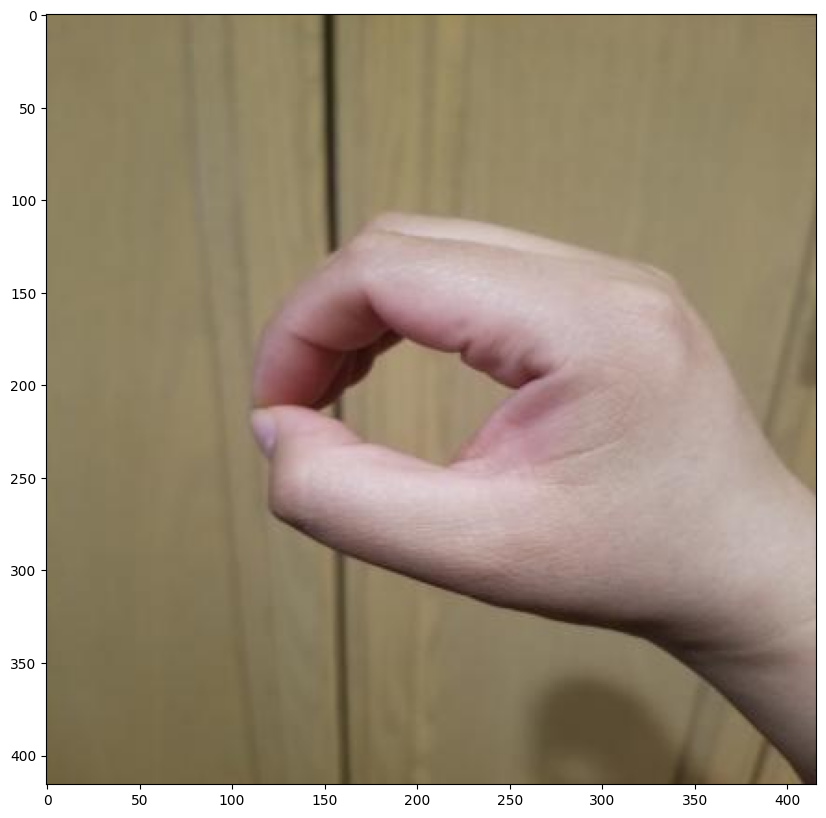

Running inference for data/test/test/W7_jpg.rf.c80a52e6a95797bd8cf3a03ec4701d99.jpg... Done


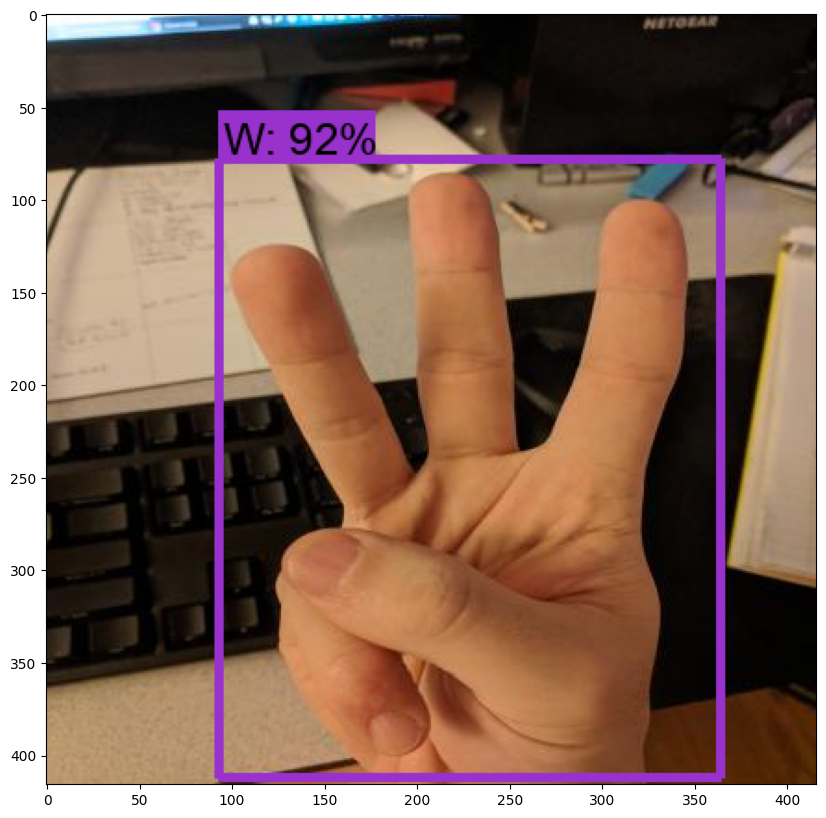

In [20]:
path2images = [
    "data/test/test/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg",
    "data/test/test/O12_jpg.rf.9103647cd190af96ac2a83f7bd1d0ae2.jpg",
    "data/test/test/W7_jpg.rf.c80a52e6a95797bd8cf3a03ec4701d99.jpg"
]

inference_with_plot(path2images, box_th=0.4)

### Detect Object With Webcam

In [1]:
import numpy as np
import tensorflow as tf
import cv2
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_CKPT = 'exported_models/faster_rcnn/v1/saved_model'
PATH_TO_LABELS = 'data/train/Letters_label_map.pbtxt'

detection_model = tf.saved_model.load(PATH_TO_CKPT)

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

def run_inference_for_single_image(image):
    image_np = np.asarray(image)
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = detection_model(input_tensor)
    output_dict = {key:value.numpy() for key,value in output_dict.items()}

    return output_dict

def get_top_detection(output_dict, min_score_thresh=0.30):
    scores = output_dict['detection_scores'][0]
    boxes = output_dict['detection_boxes'][0]
    classes = output_dict['detection_classes'][0]

    valid_indices = np.where(scores >= min_score_thresh)[0]

    if len(valid_indices) == 0:
        return None, None, None 

    top_index = valid_indices[np.argmax(scores[valid_indices])]

    return boxes[top_index], classes[top_index], scores[top_index]

cap = cv2.VideoCapture(0)

while True:
    ret, image_np = cap.read()
    if not ret:
        break

    output_dict = run_inference_for_single_image(image_np)

    top_box, top_class, top_score = get_top_detection(output_dict, min_score_thresh=0.30)

    if top_box is not None:
        top_box = np.expand_dims(top_box, axis=0)
        top_class = np.expand_dims(top_class, axis=0)
        top_score = np.expand_dims(top_score, axis=0)

        viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np,
            top_box,
            top_class.astype(int),
            top_score,
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=1, 
            min_score_thresh=0.30,
            agnostic_mode=False
        )

    cv2.imshow('Object Detection', cv2.resize(image_np, (800, 600)))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


2024-09-08 07:15:01.200632: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-08 07:15:01.223964: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-08 07:15:01.223987: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-08 07:15:01.224004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-08 07:15:01.228553: I tensorflow/core/platform/cpu_feature_g

KeyboardInterrupt: 

: 